In [1]:
from scipy import stats as st
import scipy.stats as stats
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
sales = pd.read_excel('C:/Users/Sergei/2020_portfolio_projects/sales_ToShare.xlsx', sheet_name = 'Продажи')

In [3]:
remains = pd.read_excel('C:/Users/Sergei/2020_portfolio_projects/remains_ToShare.xlsx')

In [4]:
sales.head(3)

,Артикул старый,Размер,Месяц,"Продажи, шт."
0,02025727Y052D0/55,XS,9,88
1,02025727Y052D0/55,S,6,128
2,020245D5Z022/55D0,M,7,83


In [5]:
remains.head(3)
remains['Размер'] = remains['Размер'].str.strip()

In [6]:
def fix_index(row):
    old_code = row['Артикул старый']
    split_code =  old_code.split('/')
    if len(split_code[0]) == 12:
        new_code = (split_code[0] + split_code[1])
        return new_code
    if len(split_code[0]) == 14:
        new_code = (''.join(list(split_code[0])[0:12]) + split_code[1] + ''.join(list(split_code[0])[12:14]))
        return new_code
    if len(split_code[0]) == 16:
        new_code = split_code[0]
        return new_code    
    else:
        return old_code

In [7]:
sales['new_code'] = sales.apply(fix_index, axis = 1) 

In [8]:
sales.sample(5)

,Артикул старый,Размер,Месяц,"Продажи, шт.",new_code
8191,22024737205351S0,XS,6,64,22024737205351S0
44030,02021315901219M0,L,6,108,02021315901219M0
2090,02026118Y03100/51,XS,6,46,02026118Y0315100
27397,02026321U612A0/31,M,8,98,02026321U61231A0
30312,010242259043/01P0,XL,8,71,01024225904301P0


In [9]:
# def len_code(row):
#     lentgh = len(row['new_code'])
#     return lentgh

# sales['code_size'] = sales.apply(len_code, axis = 1)

In [10]:
def fix_index_remains(row):
    new_code = ''.join(row['Артикул новый'].split(' '))
    return new_code

In [11]:
remains['new_code'] = remains.apply(fix_index_remains, axis = 1)

In [12]:
sales['Размер'] = sales['Размер'].replace('0', 'no size')

In [13]:
# sales['Размер'].value_counts()

In [14]:
# remains['Размер'].value_counts()

In [15]:
df = sales[[ 'Месяц', 'Продажи, шт.', 'new_code']].merge(remains[['Себестоимость, руб.', 
                                                                  'Цена продажи, руб.', 'new_code','Остаток на складе, шт.']],
                                                    on='new_code', how = 'outer')

In [16]:
df.columns = ['месяц', 'продажи', 'new_code', 'себестоимость',
       'цена','остаток']

In [17]:
df.describe()

,месяц,продажи,себестоимость,цена,остаток
count,"302,421.0","302,421.0","303,896.0","303,896.0","303,896.0"
mean,9.0,84.1,905.7,"2,266.1",488.3
std,2.0,20.0,345.8,910.2,567.8
min,6.0,2.0,300.0,602.0,1.0
25%,7.0,71.0,607.0,"1,486.0",131.0
50%,9.0,84.0,911.0,"2,250.0",310.0
75%,11.0,98.0,"1,204.0","2,959.0",635.0
max,12.0,174.0,"1,500.0","4,476.0","9,610.0"


In [18]:
df['себестоимость'] = df['себестоимость'].fillna(200)
df['цена'] = df['цена'].fillna(1000)
df['продажи'] = df['продажи'].fillna(0)
df['месяц'] = df['месяц'].fillna(0)
df['остаток'] = df['остаток'].fillna(0)

In [19]:
df['месяц'] = df['месяц'].astype(int)
df['сумма_продаж'] = df['цена'] * df['продажи']
df['сумма_прибыли'] = df['продажи'] * (df['цена'] - df['себестоимость'])

In [20]:
df.groupby('месяц').agg({'сумма_прибыли':'sum','сумма_продаж':'sum',}).reset_index().sort_values(by = 'сумма_продаж', ascending = False)

,месяц,сумма_прибыли,сумма_продаж
3,8,"4,957,553,166.0","8,256,091,435.0"
6,11,"4,948,056,542.0","8,241,074,535.0"
2,7,"4,939,804,131.0","8,227,202,397.0"
4,9,"4,933,500,198.0","8,213,942,791.0"
7,12,"4,931,479,733.0","8,212,290,544.0"
5,10,"4,929,346,323.0","8,209,721,672.0"
1,6,"4,927,362,938.0","8,205,817,650.0"
0,0,0.0,0.0


In [21]:
# сумма продаж в рублях за июль
print('сумма продаж в рублях за июль : ',df[df['месяц'] == 7]['сумма_продаж'].sum(),'рублей')

сумма продаж в рублях за июль :  8227202397.0 рублей


In [22]:
# сумма прибыли в рублях за октябрь
print('сумма прибыли в рублях за октябрь : ',df[df['месяц'] == 10]['сумма_прибыли'].sum(),'рублей')

сумма прибыли в рублях за октябрь :  4929346323.0 рублей


In [23]:
print('артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе')
df[df['месяц'] == 8].groupby('new_code')['сумма_продаж'].sum().reset_index().sort_values(by = 'сумма_продаж',ascending = False).head(5).reset_index().loc[4:]

артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе


,index,new_code,сумма_продаж
4,837,02024717Y04255D0,"16,046,103.0"


In [24]:
df

,месяц,продажи,new_code,себестоимость,цена,остаток,сумма_продаж,сумма_прибыли
0,9,88.0,02025727Y05255D0,854.0,"1,939.0",335.0,"170,632.0","95,480.0"
1,9,88.0,02025727Y05255D0,"1,369.0","3,956.0",764.0,"348,128.0","227,656.0"
2,9,88.0,02025727Y05255D0,539.0,"1,471.0",861.0,"129,448.0","82,016.0"
3,9,88.0,02025727Y05255D0,902.0,"1,912.0",256.0,"168,256.0","88,880.0"
4,9,88.0,02025727Y05255D0,564.0,"1,258.0",945.0,"110,704.0","61,072.0"
...,...,...,...,...,...,...,...,...
304409,0,0.0,920239I8G0250200,538.0,"1,442.0",81.0,0.0,0.0
304410,0,0.0,920239I8G1553000,"1,244.0","3,346.0",110.0,0.0,0.0
304411,0,0.0,920239I8G1553000,"1,079.0","3,097.0",501.0,0.0,0.0
304412,0,0.0,920239I8G1553000,449.0,"1,051.0",499.0,0.0,0.0


In [25]:
top_10_august = df[df['месяц'] == 8].groupby('new_code')['сумма_продаж'].sum().reset_index().sort_values(by = 'сумма_продаж',ascending = False).head(10).reset_index()['new_code']

In [26]:
print('остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе')
remains[remains['new_code'].isin(top_10_august)].groupby('new_code').agg({'Остаток на складе, шт.':'sum'}).sort_values(by = 'Остаток на складе, шт.',
                                                                                                                      ascending = False)

остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе


,"Остаток на складе, шт."
new_code,
02021714Z10351D0,10165
02021714Z10350D0,5152
22024712Y06350D0,5043
02024717Y04255D0,4695
02024717Y04251D0,3376
02021712Y01255D0,3042
02021714S02350D0,2932
22023714Z11351D0,2622
22023714Z11355D0,1989


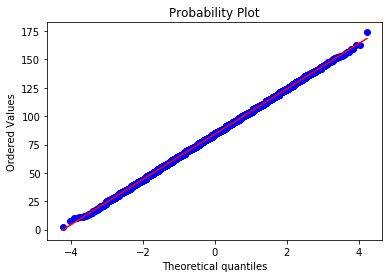

In [27]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = sales['Продажи, шт.']
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

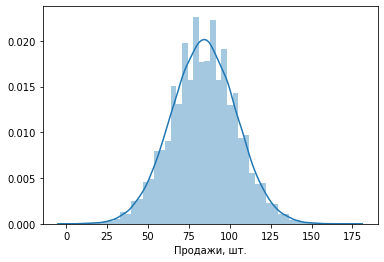

In [28]:
ax = sns.distplot(sales['Продажи, шт.'])

In [29]:
# не совсем понял, что такое квадратное отклонение, стандартное отклонение и дисперсию нашёл
print('Стандартное отклонение :{:.1f}'.format(np.std(sales['Продажи, шт.'])))
print('Дисперсия: {:.1f}'.format(np.var(sales['Продажи, шт.'])))

Стандартное отклонение :19.9
Дисперсия: 397.5


In [30]:
# самый простой способ оценить основные параметры распределения выборки
sales.describe()

,Месяц,"Продажи, шт."
count,"60,074.0","60,074.0"
mean,9.0,84.1
std,2.0,19.9
min,6.0,2.0
25%,7.0,71.0
50%,9.0,84.0
75%,11.0,98.0
max,12.0,174.0


In [31]:
print('95 процентов значений продаж лежат в диапазоне {:.0f} - {:.0f} шт.'.format(sales['Продажи, шт.'].quantile(0.025),
                sales['Продажи, шт.'].quantile(0.975)))

95 процентов значений продаж лежат в диапазоне 45 - 123 шт.


In [32]:
sales_sizes_letter = sales[sales['Размер'].isin(['M',
    'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS'])].groupby('Размер').agg({'Продажи, шт.':'sum'}).reset_index()
sales_sizes = sales.groupby('Размер').agg({'Продажи, шт.':'sum'}).reset_index()
remains_sizes_letter = remains[remains['Размер'].isin(['M',
      'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS'])].groupby('Размер').agg({'Остаток на складе, шт.':'sum'}).reset_index()
remains_sizes = remains.groupby('Размер').agg({'Остаток на складе, шт.':'sum'}).reset_index()

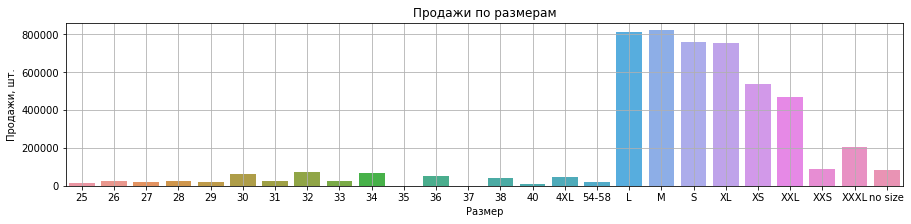

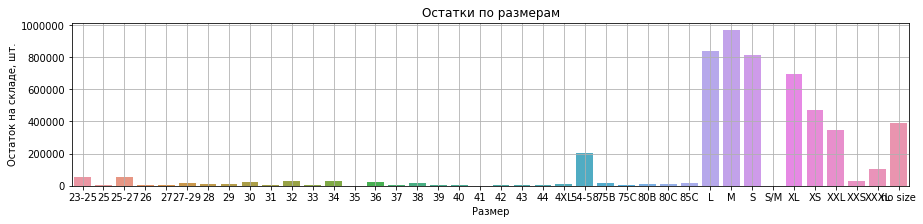

In [33]:
fig = plt.figure(figsize=(15,3))
ax = sns.barplot(x="Размер", y="Продажи, шт.", data=sales_sizes)
plt.title('Продажи по размерам')
plt.grid()
plt.show()
fig = plt.figure(figsize=(15,3))
ax = sns.barplot(x="Размер", y="Остаток на складе, шт.", data=remains_sizes)
plt.title('Остатки по размерам')
plt.grid()
plt.show()


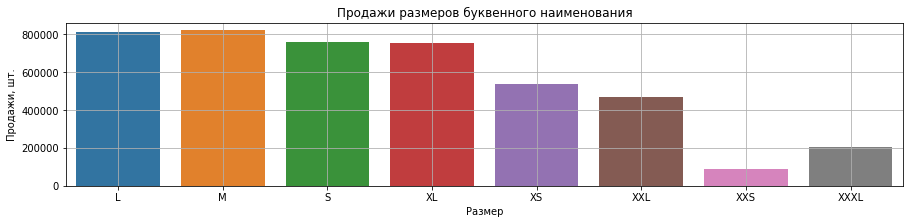

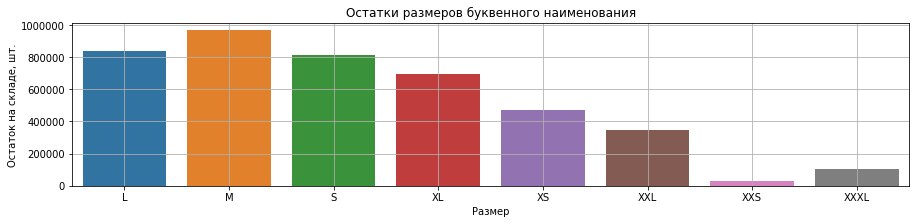

In [34]:
fig = plt.figure(figsize=(15,3))
ax = sns.barplot(x="Размер", y="Продажи, шт.", data=sales_sizes_letter)
plt.grid()
plt.title('Продажи размеров буквенного наименования')
plt.show()
fig = plt.figure(figsize=(15,3))
ax = sns.barplot(x="Размер", y="Остаток на складе, шт.", data=remains_sizes_letter)
plt.title('Остатки размеров буквенного наименования')
plt.grid()
plt.show()